In [27]:
from PIL import Image
import json
import torchvision.transforms.functional as TF
import torch
import torchvision
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from src.detector.utils import binary_mask_iou
from src.detector.utils import box_nms, mask_nms
from src.tracker.data_track_precomputed import MOT16SequencesPrecomputed
from src.utils.torch_utils import dict2keys_and_items
from src.detector.visualize import visualize_detection
from src.detector.object_detector import init_detector
from src.detector.data_obj_detect import MOT16ObjDetect
from src.detector.utils import obj_detect_transforms
from src.motion_prediction.dataset import MOT16MotionPrediction

root = "data/MOT16"
split = "mini"
det1_path = "data/precomputed_detection/coco_maskrcnn100"
det2_path = "data/precomputed_detection/coco_maskrcnn100_masknms20"


dataset = MOT16MotionPrediction(root, split, processed=False, future_len=20, history_len=20)



In [28]:
from src.motion_prediction.kalman import SORTKalmanFilter
import numpy as np

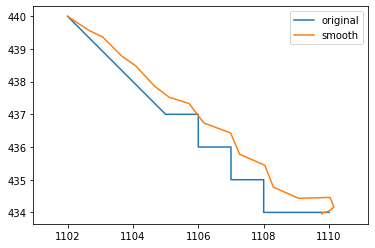

In [32]:
kalman = SORTKalmanFilter()
hist, fut = dataset[1000]
smooth_traj = []
for box in hist:
    kalman.update(box)
    smooth = kalman.predict()
    smooth_traj.append(smooth)
smooth_traj = torch.stack(smooth_traj, dim=0)

plt.plot(hist[:, 0], hist[:, 1], label="original")
plt.plot(smooth_traj[:, 0], smooth_traj[:, 1], label="smooth")
plt.axis("equal");
plt.legend(loc="best")